In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
random.seed(2025)
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [2]:
electricity = pd.read_pickle('../input/electricity_only.pkl')
weather = pd.read_pickle('../input/weather_only.pkl')
areas = pd.read_pickle('../input/areas_only.pkl')

In [3]:
electricity

,ICT,"U06, U06A, U05B",OBS,"U05, U04, U04B, GEO",TEG,LIB,MEK,SOC,S01,D04
2023-01-01 00:00:00,135.0,98.4,7.540,84.9,5.0,27.2,13.6,67.5,2.9,10.6
2023-01-01 01:00:00,134.7,96.4,7.299,85.8,6.0,27.0,13.7,67.2,2.9,12.3
2023-01-01 02:00:00,133.1,98.1,7.129,84.8,5.0,27.0,13.8,67.4,2.8,12.0
2023-01-01 03:00:00,129.9,96.3,7.258,84.9,6.0,26.2,13.7,67.3,2.8,10.9
2023-01-01 04:00:00,130.7,97.4,7.238,94.1,5.0,26.8,14.0,67.6,2.9,11.5
...,...,...,...,...,...,...,...,...,...,...
2023-12-31 19:00:00,121.9,104.5,7.830,86.4,5.0,38.8,12.4,77.2,17.2,20.2
2023-12-31 20:00:00,121.1,103.4,7.836,81.1,5.0,38.5,11.1,75.3,17.6,21.1
2023-12-31 21:00:00,132.5,100.3,7.744,80.1,5.0,37.4,10.6,74.6,17.0,18.2
2023-12-31 22:00:00,149.0,100.0,7.982,80.5,5.0,38.0,11.6,74.6,17.5,18.1


In [4]:
electricity.describe()

,ICT,"U06, U06A, U05B",OBS,"U05, U04, U04B, GEO",TEG,LIB,MEK,SOC,S01,D04
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,176.382905,141.706199,4.456877,121.687657,2.986073,84.433476,20.257489,113.138676,14.628784,13.710091
std,41.999310,39.475170,2.706732,36.821231,2.412715,50.941329,7.949168,47.348681,13.433499,6.046865
min,114.900000,75.800000,0.836000,58.200000,0.000000,20.200000,0.000000,59.500000,1.300000,1.900000
25%,140.200000,111.400000,1.338750,94.100000,1.000000,35.900000,14.100000,72.100000,3.000000,8.800000
50%,164.500000,124.800000,4.742500,105.300000,2.000000,72.400000,17.700000,94.200000,9.200000,12.600000
75%,210.100000,167.525000,7.099000,147.300000,4.000000,133.100000,25.200000,153.600000,23.900000,17.700000
max,398.500000,315.700000,9.675000,262.500000,21.000000,278.300000,53.800000,250.200000,56.900000,41.800000


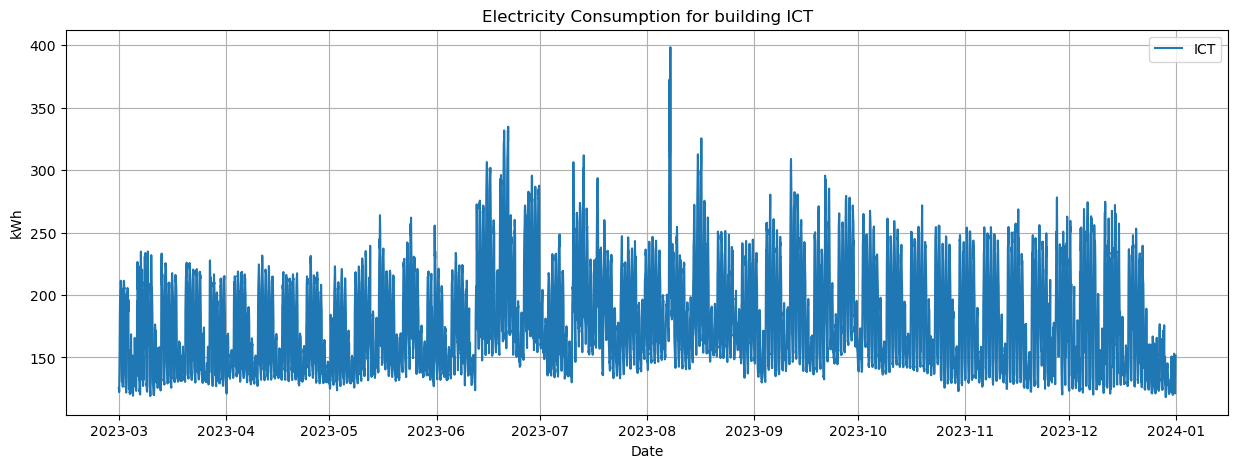

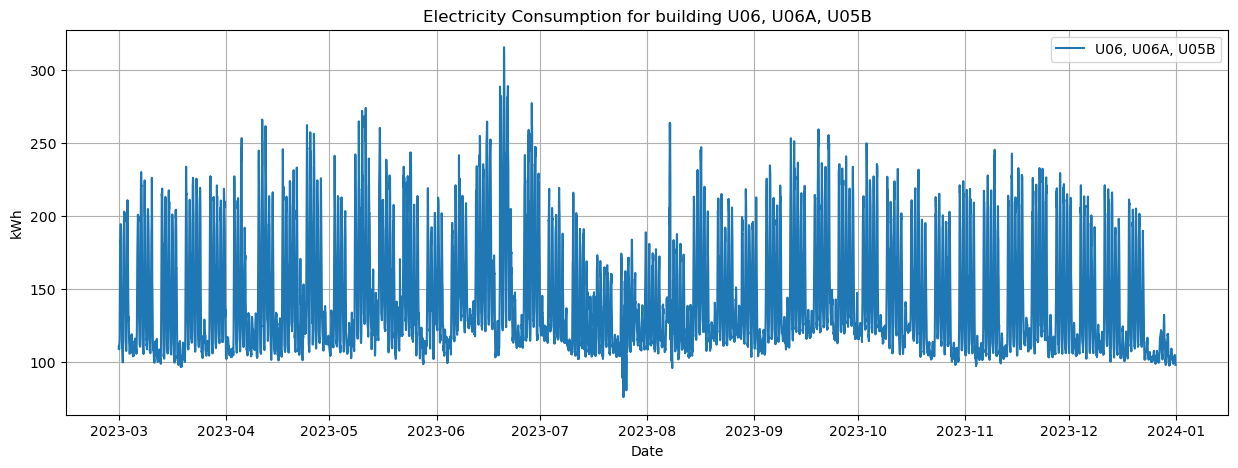

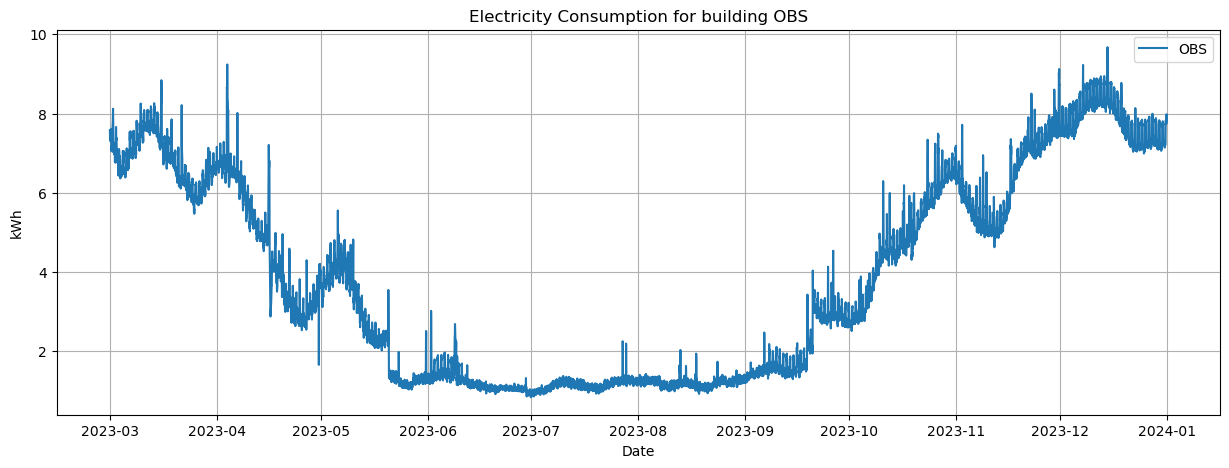

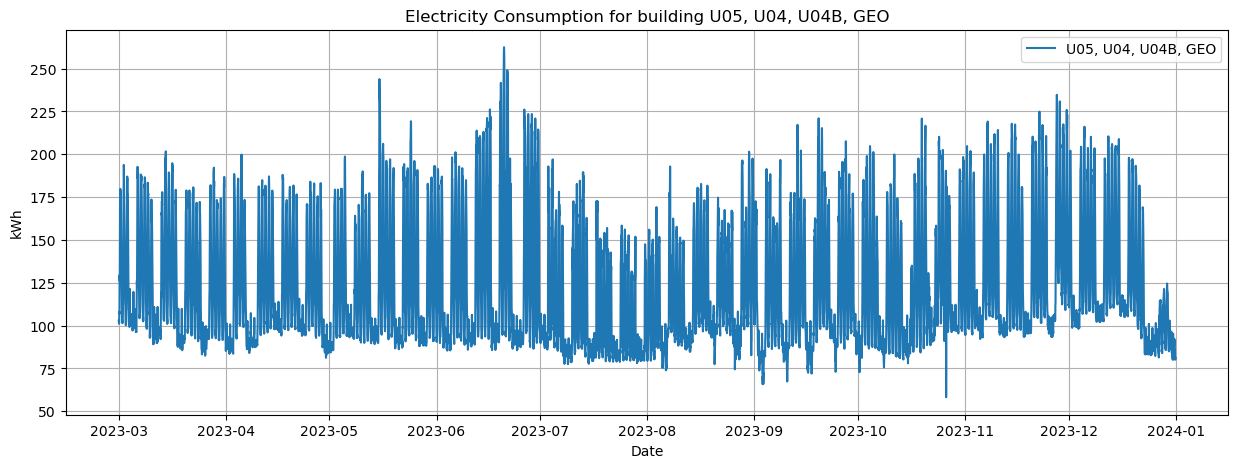

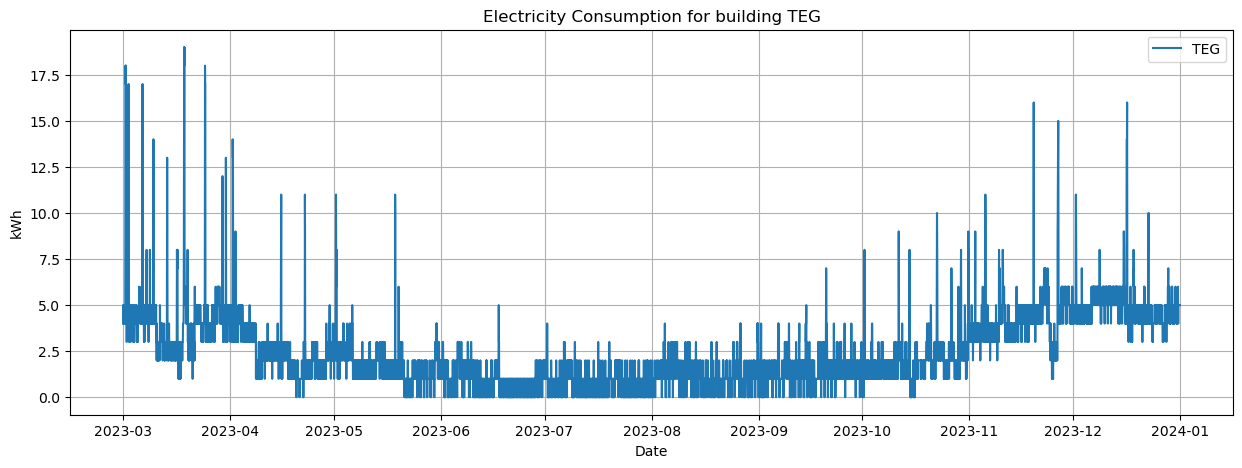

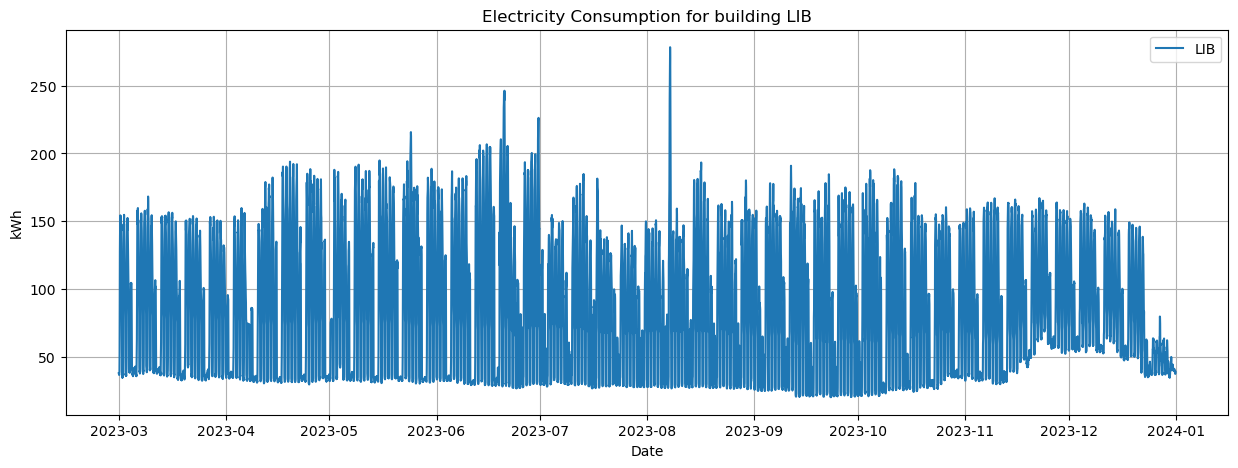

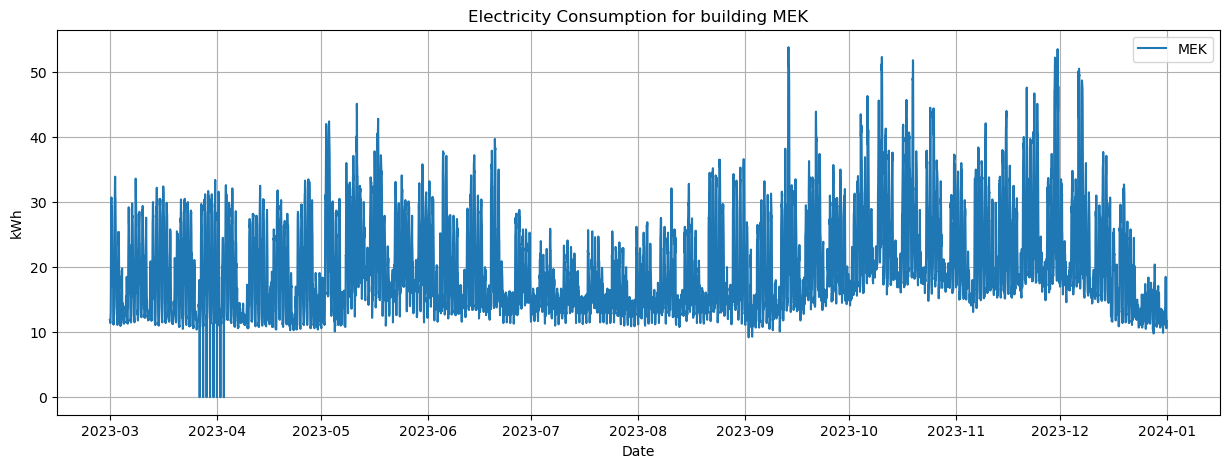

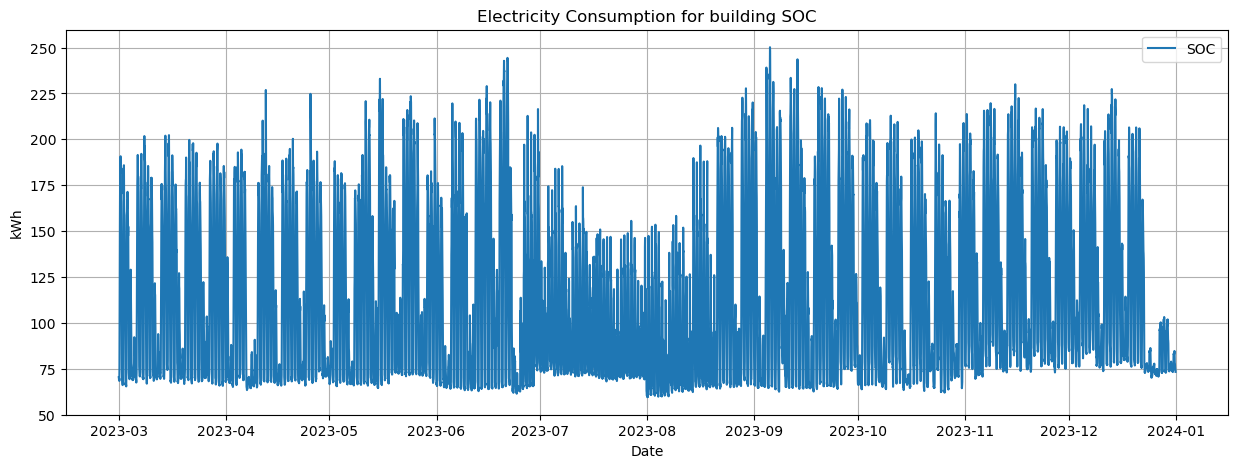

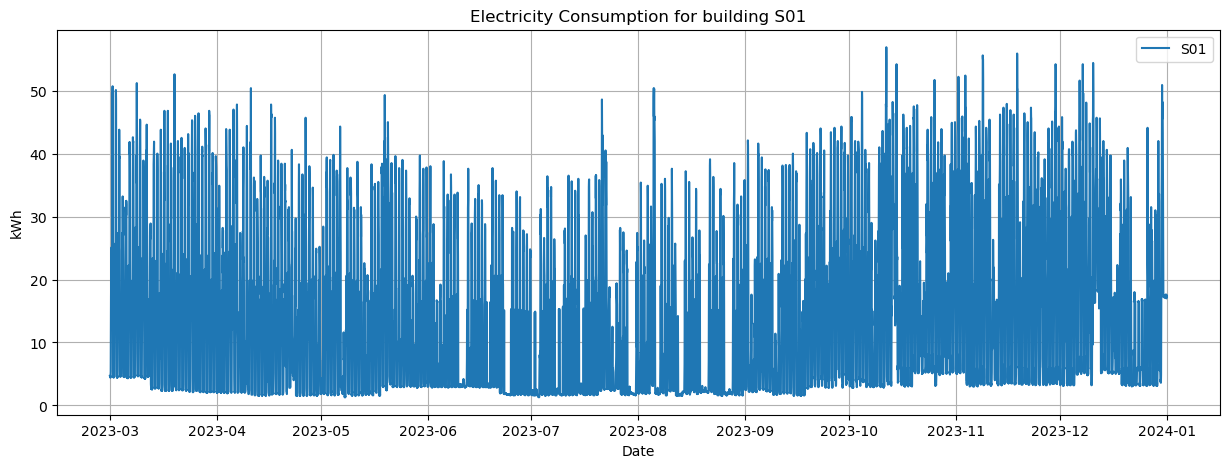

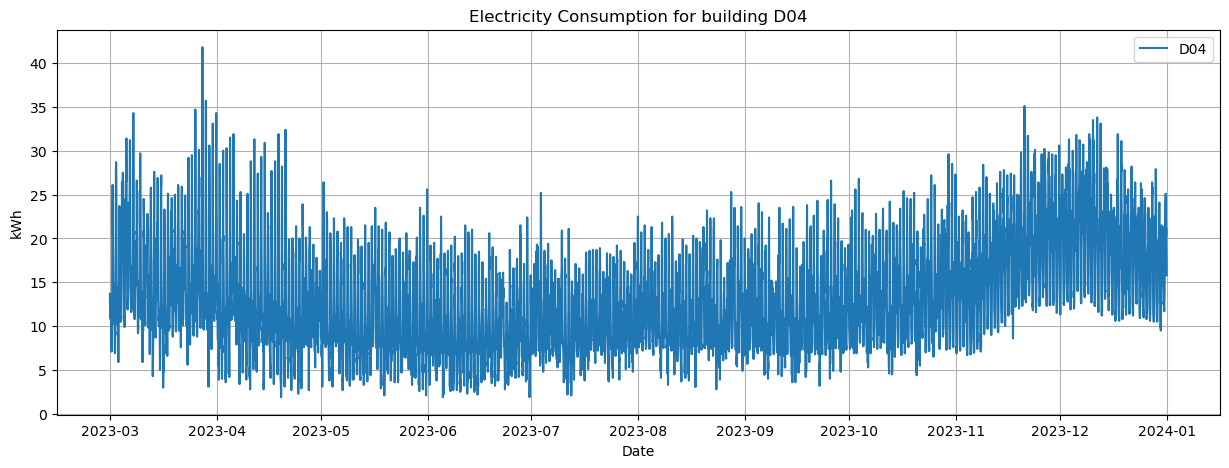

In [5]:
electricity_visualization = electricity[(electricity.index >= '2023-03-01') & (electricity.index < '2024-01-01')]

building_columns = electricity_visualization.columns

for col in building_columns:
    plt.figure(figsize=(15, 5))
    plt.plot(electricity_visualization.index, electricity_visualization[col], label=col)
    plt.title(f"Electricity Consumption for building {col}")
    plt.xlabel("Date")
    plt.ylabel("kWh")
    plt.legend()
    plt.grid()
    plt.show()

In [6]:
electricity = electricity[(electricity.index >= '2023-01-01') & (electricity.index < '2023-03-01')]
electricity

,ICT,"U06, U06A, U05B",OBS,"U05, U04, U04B, GEO",TEG,LIB,MEK,SOC,S01,D04
2023-01-01 00:00:00,135.0,98.4,7.540,84.9,5.0,27.2,13.6,67.5,2.9,10.6
2023-01-01 01:00:00,134.7,96.4,7.299,85.8,6.0,27.0,13.7,67.2,2.9,12.3
2023-01-01 02:00:00,133.1,98.1,7.129,84.8,5.0,27.0,13.8,67.4,2.8,12.0
2023-01-01 03:00:00,129.9,96.3,7.258,84.9,6.0,26.2,13.7,67.3,2.8,10.9
2023-01-01 04:00:00,130.7,97.4,7.238,94.1,5.0,26.8,14.0,67.6,2.9,11.5
...,...,...,...,...,...,...,...,...,...,...
2023-02-28 19:00:00,204.3,150.9,7.932,131.8,5.0,107.8,15.9,142.0,35.4,29.5
2023-02-28 20:00:00,142.0,132.5,7.926,118.3,5.0,96.9,17.1,117.8,34.7,29.0
2023-02-28 21:00:00,129.8,123.3,7.963,116.0,5.0,83.5,20.5,100.8,23.7,22.9
2023-02-28 22:00:00,126.8,115.7,7.898,110.8,4.0,80.3,19.3,85.9,4.8,22.0


In [7]:
scaler = MinMaxScaler()
# t-SNE visualization
df_scaled = pd.DataFrame(scaler.fit_transform(electricity), columns=electricity.columns, index=electricity.index)

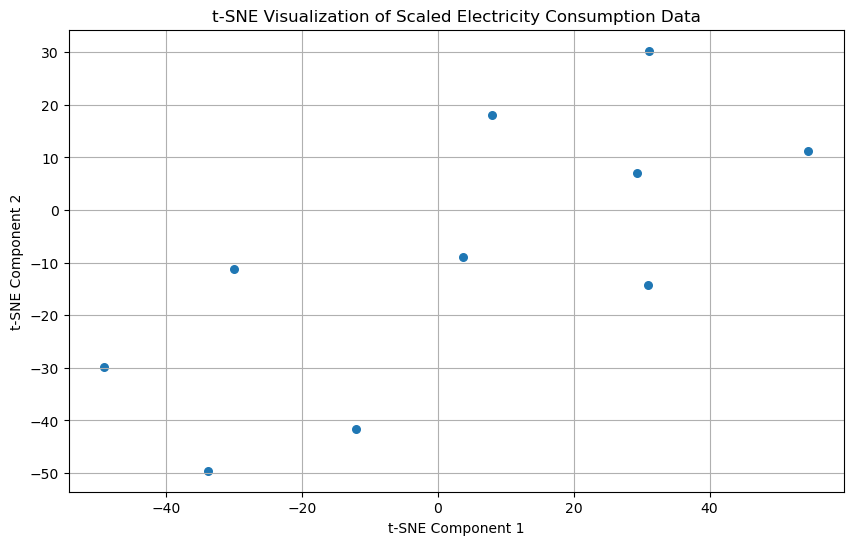

In [8]:
tsne = TSNE(n_components=2, random_state=2025, perplexity=6)
tsne_results = tsne.fit_transform(df_scaled.T)

plt.figure(figsize=(10, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], s=30)
plt.title("t-SNE Visualization of Scaled Electricity Consumption Data")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.grid(True)
plt.show()

c:\Users\ADMIN\anaconda3\envs\time_series\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


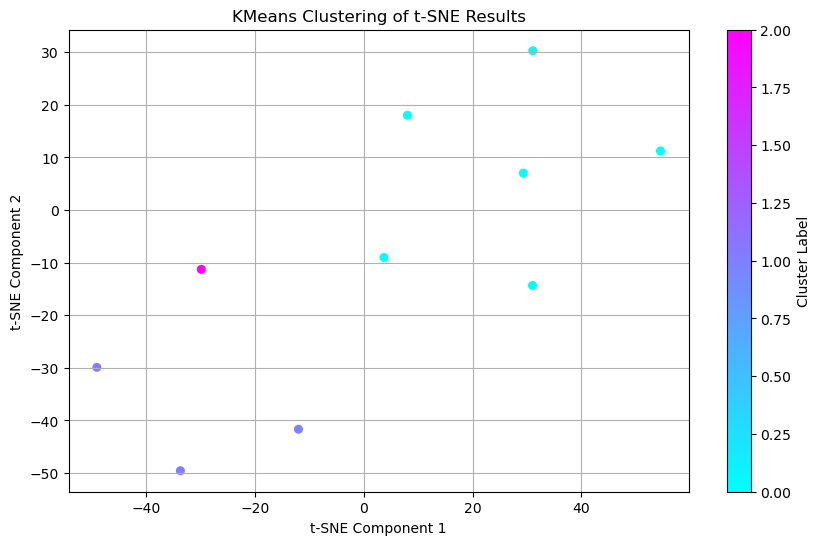

In [9]:
# Kmeans clustering
kmeans = KMeans(n_clusters=3, random_state=2025)
kmeans.fit(tsne_results)
clusters = kmeans.labels_

plt.figure(figsize=(10, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=clusters, s=30, cmap='cool')
plt.title("KMeans Clustering of t-SNE Results")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()

In [10]:
cluster_labels = clusters
building_names = building_columns

df_clusters = pd.DataFrame({
    'Building': building_names,
    'Cluster': cluster_labels
})

for cluster_id, group in df_clusters.groupby('Cluster'):
    print(f"\nCluster {cluster_id}:")
    for building in group['Building']:
        print(f"  - {building}")


Cluster 0:
  - ICT
  - U06, U06A, U05B
  - U05, U04, U04B, GEO
  - LIB
  - MEK
  - SOC

Cluster 1:
  - OBS
  - S01
  - D04

Cluster 2:
  - TEG


In [11]:
areas

,Buid_ID,Area [m2]
0,ICT,11413.0
1,"U06, U06A, U05B",15413.0
2,OBS,160.4
3,"U05, U04, U04B, GEO",13654.0
4,TEG,1968.1
5,LIB,11062.0
6,MEK,4434.0
7,SOC,10360.0
8,S01,5302.0
9,D04,4323.6
